## 1. Import libraries

In [1]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
fetch_housing_data()

In [3]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [4]:
# Importing tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Softmax, Dropout
from tensorflow.keras import optimizers

In [5]:
# Checking the tensorflow libraries
print(tf.__version__)


2.12.0


# 2. Data exploration

In [6]:
#Loading the dataset

housing_df = load_housing_data()

In [7]:
housing_df.shape

(20640, 10)

In [8]:
# Displaying the data

housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
# Checking for the null values

housing_df.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [10]:
#Count of the null values in each columns

housing_df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [11]:
#FIX Categories
d = {'<1H OCEAN':'LESS_1H_OCEAN', 'INLAND':'INLAND', 'ISLAND':'ISLAND', 'NEAR BAY':'NEAR_BAY', 'NEAR OCEAN':'NEAR_OCEAN'}
housing_df['ocean_proximity'] = housing_df['ocean_proximity'].map(lambda s: d[s])

In [12]:
#add New Variables
housing_df["rooms_per_household"] = housing_df["total_rooms"]/housing_df["households"]
housing_df["population_per_household"]=housing_df["population"]/housing_df["households"]

In [13]:
#fix missing data
median = housing_df["total_bedrooms"].median()
housing_df["total_bedrooms"].fillna(median, inplace=True)

In [14]:
one_hot = pd.get_dummies(housing_df['ocean_proximity'])
housing_df = housing_df.drop('ocean_proximity', axis=1)
housing_df = housing_df.join(one_hot)

In [15]:
housing_df.shape

(20640, 16)

In [16]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   rooms_per_household       20640 non-null  float64
 10  population_per_household  20640 non-null  float64
 11  INLAND                    20640 non-null  uint8  
 12  ISLAND                    20640 non-null  uint8  
 13  LESS_1H_OCEAN             20640 non-null  uint8  
 14  NEAR_B

In [17]:
# Dividing the dataset variables
X=pd.DataFrame(columns=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity'
                        'rooms_per_household','population_per_household','INLAND','ISLAND','LESS_1H_OCEAN','NEAR_BAY','NEAR_OCEAN' ],data=housing_df)
y=pd.DataFrame(columns=['median_house_value'],data=housing_df)

In [18]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximityrooms_per_household,population_per_household,INLAND,ISLAND,LESS_1H_OCEAN,NEAR_BAY,NEAR_OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NaN,2.555556,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NaN,2.109842,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NaN,2.802260,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NaN,2.547945,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NaN,2.181467,0,0,0,1,0


In [19]:
y.head()

,median_house_value
0,452600.0
1,358500.0
2,352100.0
3,341300.0
4,342200.0


# 3. Feature Scaling and test train split

In [20]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing_df, test_size=0.3, random_state=42)

In [21]:
target = 'median_house_value'
features = list(train_set.columns)
features = [f for f in features if f!=target]

In [22]:
X_train = train_set[features]
y_train = train_set[[target]]

X_test = test_set[features]
y_test = test_set[[target]]

In [23]:
X_train.shape

(14448, 15)

In [24]:
TARGET = "median_house_value"
columns_predictors = [col for col in train_set.columns if col not in [TARGET]]
columns_categorical = ['INLAND','ISLAND','LESS_1H_OCEAN','NEAR_BAY','NEAR_OCEAN']
columns_numerical = [col for col in columns_predictors if col not in columns_categorical]
print(f"TARGET: {TARGET}")
print(f"columns_predictors: {columns_predictors}")
print(f"columns_categorical: {columns_categorical}")
print(f"columns_numerical: {columns_numerical}")

TARGET: median_house_value
columns_predictors: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'population_per_household', 'INLAND', 'ISLAND', 'LESS_1H_OCEAN', 'NEAR_BAY', 'NEAR_OCEAN']
columns_categorical: ['INLAND', 'ISLAND', 'LESS_1H_OCEAN', 'NEAR_BAY', 'NEAR_OCEAN']
columns_numerical: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'population_per_household']


In [25]:
#Create numerical pipeline to transform numerical values

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder ,StandardScaler

#Convert the non transformed Dataframe into list.
columns_categorical_list = list(columns_categorical)
columns_numerical_list = list(columns_numerical)

pipeline_numerical = Pipeline([
  ('scaler', StandardScaler()),
])

pipeline_full = ColumnTransformer([
  ("numerical", pipeline_numerical, columns_numerical_list),
])

In [26]:
pipeline_full.fit(X_train)
X_train = pipeline_full.transform(X_train)
X_test = pipeline_full.transform(X_test)
print(f"X_train transformed.shape: {X_train.shape}")
print(f"X_test transformed.shape: {X_test.shape}")

X_train transformed.shape: (14448, 10)
X_test transformed.shape: (6192, 10)


# Lets start building an Artificial Nueral Network

In [56]:
Create_model = Sequential()

#Input Layer
Create_model.add(Dense(X_train.shape[1], activation='relu', input_dim = X_train.shape[1]))

#Hidden Layer
Create_model.add(Dense(512,kernel_initializer='normal', activation='relu'))
Create_model.add(Dense(512,kernel_initializer='normal', activation='relu'))
Create_model.add(Dense(256,kernel_initializer='normal', activation='relu'))
Create_model.add(Dense(128,kernel_initializer='normal', activation='relu'))
Create_model.add(Dense(64,kernel_initializer='normal', activation='relu'))
Create_model.add(Dense(32,kernel_initializer='normal', activation='relu'))
#Output Layer
Create_model.add(Dense(1,kernel_initializer='normal', activation = 'relu'))


In [57]:
#Compile the network

Create_model.compile(loss = 'MeanSquaredError', optimizer='adam', metrics=['mse','mae'])
Create_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 512)               5632      
                                                                 
 dense_9 (Dense)             (None, 512)               262656    
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dense_12 (Dense)            (None, 64)                8256      
                                                                 
 dense_13 (Dense)            (None, 32)               

Create Image of your model

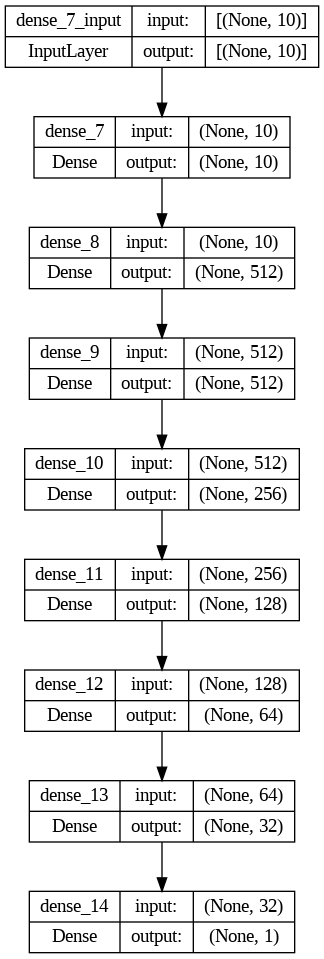

In [58]:
tf.keras.utils.plot_model(Create_model, show_shapes=True)

In [59]:
#library to use KerasClassifier
!pip install scikeras

In [60]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasRegressor

batch_size = [50,75]
epochs = [3,5]

Hyp_Model_1 = KerasRegressor(model=Create_model)

param_grid = dict(batch_size=batch_size, epochs = epochs)
GridSearch = GridSearchCV(Hyp_Model_1, param_grid, cv=5, scoring='neg_mean_squared_error', error_score="raise", n_jobs=-1, verbose=0)

In [61]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
history = GridSearch.fit(X_train, y_train)

INFO:tensorflow:Assets written to: ram://17a1eb91090c4e33932738d3234ca50d/assets
INFO:tensorflow:Assets written to: ram://41b11372acef4071b83a3856488da2a3/assets
INFO:tensorflow:Assets written to: ram://d05b942689e945638ca685b681128999/assets
INFO:tensorflow:Assets written to: ram://bb7ff75cb99b4ea4b38ac68b8fe95373/assets
INFO:tensorflow:Assets written to: ram://a5ef88602c234628908854c2207d2a11/assets
INFO:tensorflow:Assets written to: ram://efd848b5a2eb4c709f2645a82ad03f26/assets
INFO:tensorflow:Assets written to: ram://2b074bdca8254ad39905b7c1595ae278/assets
INFO:tensorflow:Assets written to: ram://cc82d356092a4db1a0dfd6603ec153c5/assets
INFO:tensorflow:Assets written to: ram://4b8ced303e424824977fb4d57aafc1d9/assets
INFO:tensorflow:Assets written to: ram://3d34f59bc0f74c9786d391a01546b1e6/assets
INFO:tensorflow:Assets written to: ram://c3e669be0d44450baf1e361ea04a507c/assets
INFO:tensorflow:Assets written to: ram://44731181368946d1b7d7cbbf8290b769/assets
INFO:tensorflow:Assets writt

Epoch 1/5
289/289 [==============================] - 4s 6ms/step - loss: 19077322752.0000 - mse: 19077322752.0000 - mae: 99486.2812
Epoch 2/5
289/289 [==============================] - 2s 6ms/step - loss: 5595227136.0000 - mse: 5595227136.0000 - mae: 53394.5508
Epoch 3/5
289/289 [==============================] - 2s 7ms/step - loss: 4716840448.0000 - mse: 4716840448.0000 - mae: 49427.5000
Epoch 4/5
289/289 [==============================] - 3s 10ms/step - loss: 4481528320.0000 - mse: 4481528320.0000 - mae: 48123.1211
Epoch 5/5
289/289 [==============================] - 2s 6ms/step - loss: 4305234944.0000 - mse: 4305234944.0000 - mae: 47202.5859


In [62]:
best_params = GridSearch.best_params_
best_estimators = GridSearch.best_estimator_

print(best_params)
print(best_estimators)

{'batch_size': 50, 'epochs': 5}
KerasRegressor(
	model=<keras.engine.sequential.Sequential object at 0x7b6e0619b8b0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=50
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=5
)


In [63]:
y_prediction = best_estimators.predict(X_test)


124/124 [==============================] - 0s 2ms/step


In [64]:
from sklearn.metrics import mean_squared_error
import numpy as np

final_mse = mean_squared_error(y_prediction, y_test)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

64964.48681187192


Another way to Train Keras Models with L2 and Dropouts and callbacks like Early Stopping and Reduce LR on Plateau

In [36]:
Create_model_2 = Sequential()

#Input Layer
Create_model_2.add(Dense(X_train.shape[1], activation='relu', input_dim = X_train.shape[1]))

#Hidden Layer
Create_model_2.add(Dense(512,kernel_initializer='normal', activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.01), bias_regularizer=tf.keras.regularizers.l2(0.015)))
Create_model_2.add(Dropout(0.3))
Create_model_2.add(Dense(256,kernel_initializer='normal', activation='relu'))
Create_model_2.add(Dropout(0.3))
Create_model_2.add(Dense(128,kernel_initializer='normal', activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.01), bias_regularizer=tf.keras.regularizers.l2(0.015)))
Create_model_2.add(Dropout(0.3))
Create_model_2.add(Dense(64,kernel_initializer='normal', activation='relu'))
Create_model_2.add(Dropout(0.3))
Create_model_2.add(Dense(32,kernel_initializer='normal', activation='relu'))
Create_model_2.add(Dropout(0.3))
#Output Layer
Create_model_2.add(Dense(1,kernel_initializer='normal', activation = 'relu'))

opt = keras.optimizers.Adam(learning_rate=0.01)

Create_model_2.compile(loss = 'MeanSquaredError', optimizer=opt, metrics=['mse','mae'])
Create_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                110       
                                                                 
 dense_9 (Dense)             (None, 512)               5632      
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)              

Early Stopping using Keras Callback

In [37]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

es = EarlyStopping(monitor='mse', verbose=1, patience=5)
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.5, patience=3, verbose=1)

history = Create_model_2.fit(X_train, y_train, batch_size=25, epochs=100, callbacks=[es,reduce_lr])

Epoch 1/100
578/578 [==============================] - 8s 6ms/step - loss: 9248637952.0000 - mse: 9248637952.0000 - mae: 68197.5312 - lr: 0.0100
Epoch 2/100
578/578 [==============================] - 5s 9ms/step - loss: 6946739712.0000 - mse: 6946739712.0000 - mae: 59875.0625 - lr: 0.0100
Epoch 3/100
578/578 [==============================] - 7s 13ms/step - loss: 6835284480.0000 - mse: 6835284992.0000 - mae: 59740.3633 - lr: 0.0100
Epoch 4/100
578/578 [==============================] - 7s 12ms/step - loss: 6860276736.0000 - mse: 6860276736.0000 - mae: 59158.3906 - lr: 0.0100
Epoch 5/100
578/578 [==============================] - 8s 14ms/step - loss: 6647616000.0000 - mse: 6647616000.0000 - mae: 58600.0938 - lr: 0.0100
Epoch 6/100
578/578 [==============================] - 6s 10ms/step - loss: 6509350912.0000 - mse: 6509350912.0000 - mae: 57955.5391 - lr: 0.0100
Epoch 7/100
578/578 [==============================] - 4s 7ms/step - loss: 6727124480.0000 - mse: 6727124480.0000 - mae: 58982

In [38]:
from matplotlib import pyplot

train_acc = Create_model_2.evaluate(X_train, y_train)
test_acc = Create_model_2.evaluate(X_test, y_test)

y_prediction = Create_model_2.predict(X_test)

from sklearn.metrics import mean_squared_error
import numpy as np

final_mse = mean_squared_error(y_prediction, y_test)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

194/194 [==============================] - 0s 2ms/step
54446.28644744702


Hyper Parameter Tuning using Random Search

In [45]:
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters # library for hyperparameter tuning
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

def build_NN_model(hp):
  Create_model_2 = Sequential()

  #Input Layer
  Create_model_2.add(Dense(X_train.shape[1], activation='relu', input_dim = X_train.shape[1]))

  #Hidden Layer
  Create_model_2.add(Dense(512,kernel_initializer='normal', activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.01), bias_regularizer=tf.keras.regularizers.l2(0.015)))
  Create_model_2.add(Dropout(0.3))
  Create_model_2.add(Dense(256,kernel_initializer='normal', activation='relu'))
  Create_model_2.add(Dropout(0.3))
  Create_model_2.add(Dense(128,kernel_initializer='normal', activation='relu', kernel_regularizer=tf.keras.regularizers.L1(0.01), bias_regularizer=tf.keras.regularizers.l2(0.015)))
  Create_model_2.add(Dropout(0.3))
  Create_model_2.add(Dense(64,kernel_initializer='normal', activation='relu'))
  Create_model_2.add(Dropout(0.3))
  Create_model_2.add(Dense(32,kernel_initializer='normal', activation='relu'))
  Create_model_2.add(Dropout(0.3))
  #Output Layer
  Create_model_2.add(Dense(1,kernel_initializer='normal', activation = 'relu'))
  hp_learning_rate = hp.Choice('learning_rate', values = [0.0001,0.001])
  opt = keras.optimizers.Adam(learning_rate=hp_learning_rate)
  Create_model_2.compile(loss = 'MeanSquaredError', optimizer=opt, metrics=['mse','mae'])
  return Create_model_2

In [52]:
tuner = RandomSearch(
    build_NN_model,
    max_trials=15,
    objective='mse',
    executions_per_trial=3,
    overwrite=True
)
es = EarlyStopping(monitor='mse', verbose=1, patience=5)
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.5, patience=3, verbose=1)

tuner.search_space_summary()
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

tuner.search(X_train, y_train, epochs=100,callbacks=[es,reduce_lr])
best_model = tuner.get_best_models(num_models=1)[0]

INFO:tensorflow:Oracle triggered exit


Trial 2 Complete [00h 08m 06s]
mse: 6192502954.666667

Best mse So Far: 5667502421.333333
Total elapsed time: 00h 13m 08s


In [53]:
train_acc = best_model.evaluate(X_train, y_train)
test_acc = best_model.evaluate(X_test, y_test)


194/194 [==============================] - 1s 5ms/step - loss: 3535642368.0000 - mse: 3535642368.0000 - mae: 41330.5391


In [54]:
y_prediction = best_model.predict(X_test)

from sklearn.metrics import mean_squared_error
import numpy as np

final_mse = mean_squared_error(y_prediction, y_test)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

194/194 [==============================] - 1s 3ms/step
59461.25925224469
